# Técnica de dividir el conjunto de entrnamiento y el conjunto de validación

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
diabetes = datasets.load_diabetes()

In [17]:
x = diabetes.data[:, np.newaxis, 2]  # Los datos de partida tienen que ser vectores de datos.

In [18]:
y = diabetes.target  # Objetivo de la función

80 % de datos para entrenar

In [19]:
x_train = x[:-60]  # Excepto las últimas 60 
x_test = x[-60:]  # Solo las últimas 60

20 % de datos para validar el modelo

In [20]:
y_train = y[:-60]  # Excepto las últimas 60
y_test = y[-60:]  # Solo las últimas 60

In [21]:
mod = linear_model.LinearRegression()  # Modelo

In [22]:
mod.fit(x_train, y_train)

LinearRegression()

In [23]:
mod.coef_

array([940.05574082])

In [24]:
mod.intercept_

152.80161883617347

Regresión lineal:

$$\tilde{y} = 940.05574082 · x + 152.80161883617347$$

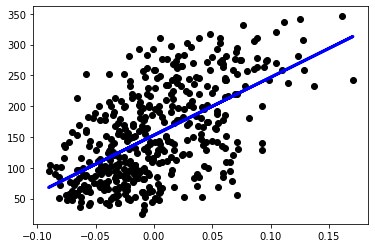

In [25]:
plt.scatter(x, y, color='k')
plt.plot(x, mod.predict(x), color='b', linewidth=3)
plt.show()

Error cuadrado medio:

$$MSE = \frac{\sum_{i=1}^n(y_i - \tilde{y_i})^2}{n}$$

In [28]:
mean_squared_error(y_train, mod.predict(x_train))

3954.0083497655905

In [29]:
r2_score(y_train, mod.predict(x_train))

0.3331463299382713

## Testing

Tomamos el conjunto de datos de test para con el modelo creado con los datos de entrenamiento ajustarlo y ver cómo le quedan los datos.

In [30]:
y_pred = mod.predict(x_test)

In [31]:
mean_squared_error(y_test, y_pred)

3490.5984515464324

< 3954.0 del modelo -> no sufre problemas de overfitting (sobreajuste)

In [32]:
r2_score(y_test, y_pred)

0.4103896998623372

$>$ 0.3331 -> mejor coeficiente de determinación que el modelo

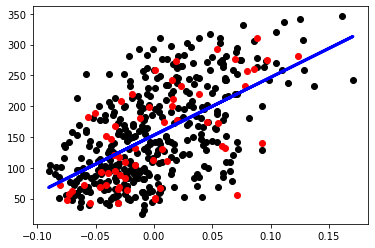

In [33]:
plt.scatter(x_train, y_train, color='k')
plt.scatter(x_test, y_test, color='r')
plt.plot(x, mod.predict(x), color='b', linewidth=3)
plt.show()